<h1><center>Лекція 2.</center></h1>
<h2><center>Візуальний аналіз з Python</center></h2>
<h2><center>Частина 2</center></h2>

<a class="anchor" id="2"></a>

## Зміст

2. [Візуалізація для прогнозування відтоку](#2)
3. [Корисні посилання](#3)

<a class="anchor" id="2"></a>

## <span style="color:blue; font-size:1.2em;">2. Візуалізація для прогнозування відтоку</span>

[Повернутися до змісту](#2)

У цій частині теми 2 ми зчитаємо в DataFrame дані щодо відтоку клієнтів телеком-оператора (той же набір даних, що і у попередній [частині теми 2](https://github.com/radiukpavlo/intelligent-data-analysis/blob/main/01_lecture-notes/ida_lecture-02_visual-analytics/ida_lecture-02_visual-analytics_part-1.ipynb)).

In [46]:
from __future__ import division, print_function

# Відключимо різні попередження Anaconda
import warnings
warnings.filterwarnings('ignore')

# Виконаємо імпортування основних бібліотек
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Задамо графіки у форматі .svg, щоби вони мали кращу чіткість
# %config InlineBackend.figure_format = 'svg' 

# Підвищимо розмір графіків за замовчуванням
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 7, 5

In [47]:
telecom_churn_url = 'https://raw.githubusercontent.com/radiukpavlo/intelligent-data-analysis/main/01_lecture-notes/ida_lecture-02_visual-analytics/telecom_churn.csv'

df = pd.read_csv(telecom_churn_url)

Перевіримо, чи дані правильно завантажилися; для цього переглянемо перші 5 рядків (метод `head`).

In [48]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Кількість рядків (клієнтів) і стовпців (ознак):

In [49]:
df.shape

(3333, 20)

Переглянемо ознаки та переконаємося, що пропусків ні в одному з них немає - скрізь по 3333 записи.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Опис ознак

| Назва                     | Опис                                                       | Тип          |
|--------------------------|------------------------------------------------------------|--------------|
| **State**                | Код штату літерами                                          | номінальний  |
| **Account length**       | Як довго клієнт обслуговується компанією                    | кількісний   |
| **Area code**            | Префікс номера телефону                                    | кількісний   |
| **International plan**   | Міжнародний роумінг (підключений / не підключений)          | бінарний     |
| **Voice mail plan**      | Голосова пошта (підключена / не підключена)                | бінарний     |
| **Number vmail messages**| Кількість голосових повідомлень                            | кількісний   |
| **Total day minutes**    | Загальна тривалість розмов упродовж дня                    | кількісний   |
| **Total day calls**      | Загальна кількість дзвінків упродовж дня                   | кількісний   |
| **Total day charge**     | Загальна сума оплати за послуги упродовж дня               | кількісний   |
| **Total eve minutes**    | Загальна тривалість розмов ввечері                         | кількісний   |
| **Total eve calls**      | Загальна кількість дзвінків ввечері                        | кількісний   |
| **Total eve charge**     | Загальна сума оплати за послуги ввечері                    | кількісний   |
| **Total night minutes**  | Загальна тривалість розмов вночі                           | кількісний   |
| **Total night calls**    | Загальна кількість дзвінків вночі                          | кількісний   |
| **Total night charge**   | Загальна сума оплати за послуги вночі                      | кількісний   |
| **Total intl minutes**   | Загальна тривалість міжнародних розмов                     | кількісний   |
| **Total intl calls**     | Загальна кількість міжнародних розмов                      | кількісний   |
| **Total intl charge**    | Загальна сума оплати за міжнародні розмови                 | кількісний   |
| **Customer service calls** | Число звернень до сервісного центру                      | кількісний   |


Цільова змінна: `Churn` - ознака відтоку, бінарна (1 - втрата клієнта, тобто відтік). Надалі ми будемо будувати моделі, які прогнозуватимуть цю ознаку за іншими, тому ми і назвали її цільовою.

Поглянемо на розподіл цільового класу - відтоку клієнтів.

In [51]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

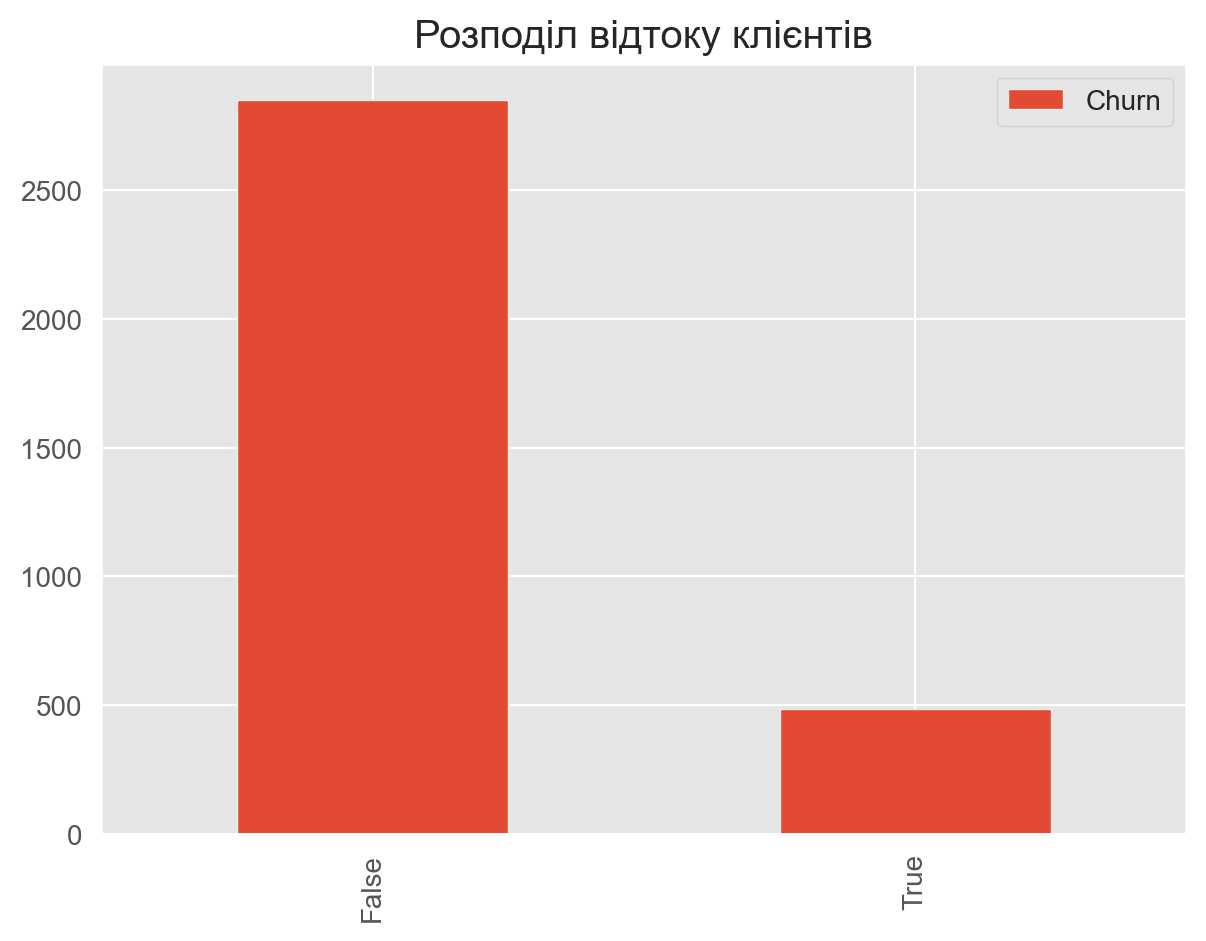

In [52]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Розподіл відтоку клієнтів')
plt.gcf().set_dpi(100)

Виділимо такі групи ознак (поміж усіх крім `Churn`):
 - бінарні: `International plan`, `Voice mail plan`;
 - категоріальні: `State`;
 - порядкові: `Customer service calls`;
 - кількісні: всі інші.

Переглянемо кореляції кількісних ознак. За розфарбованою матрицею кореляцій видно, що такі ознаки як `Total day charge` вважаються за проговореним хвилинам (`Total day minutes`). Тобто 4 ознаки можна викинути, вони не несуть корисної інформації.

In [53]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()

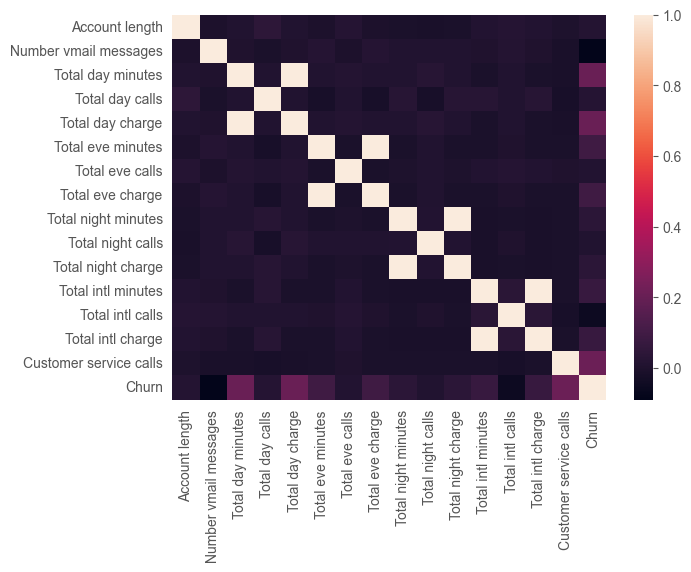

In [54]:
sns.heatmap(corr_matrix)
plt.gcf().set_dpi(100)

Тепер глянемо на розподіли всіх ознак, що нас цікавлять. Подамо бінарні/категоріальні/порядкові ознаки за відокремленими групами.

In [55]:
features = list(set(df.columns) - {'State', 'International plan', 'Voice mail plan', 'Area code', 'Total day charge',
                                   'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn'})

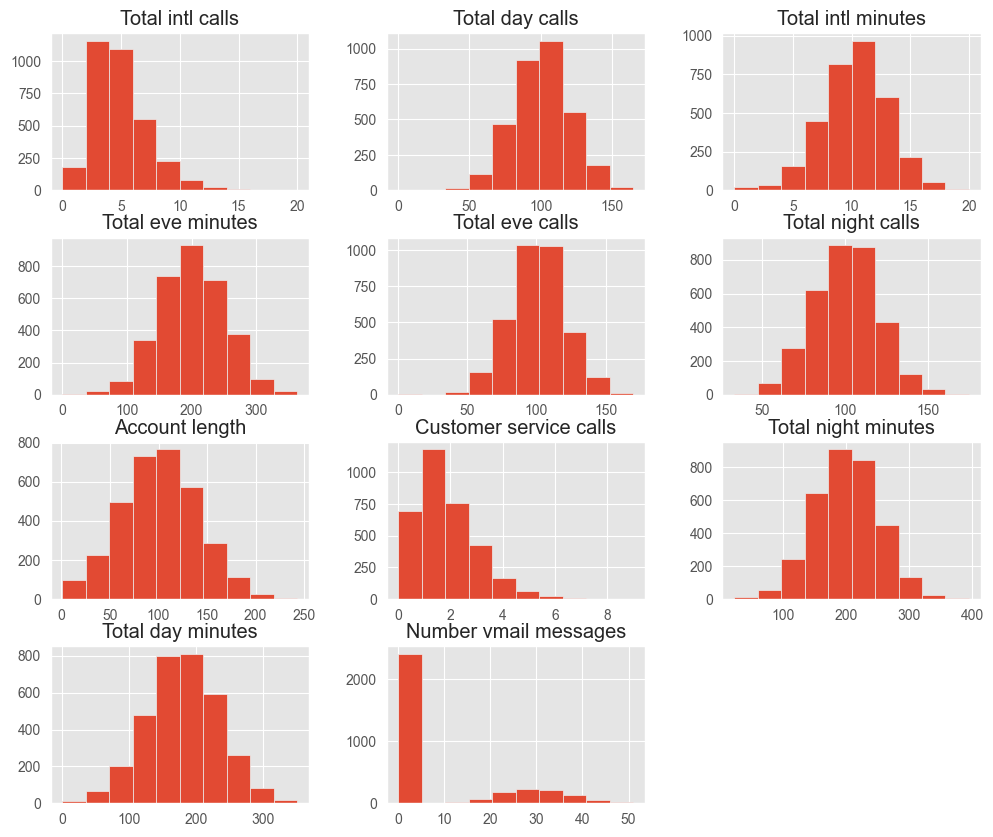

In [56]:
df[features].hist(figsize=(12,10))
plt.gcf().set_dpi(100)

З рисунку вище бачимо, що більшість ознак розподілені нормально. Винятки - кількість дзвінків в сервісний центр (`Customer service calls`) (тут більше підходить пуасоновський розподіл) й кількість голосових повідомлень (`Number vmail messages`, пік в нулі, тобто це ті, у кого голосова пошта не підключена). Також зміщеним є розподіл кількості міжнародних дзвінків (`Total intl calls`).

Ще корисно будувати ось такі картинки, де на головній діагоналі малюються розподіли ознак, а поза головною діагоналлю - діаграми розсіювання для пар ознак. 

In [57]:
# sns.pairplot(df[features + ['Churn']], hue='Churn')
# даний кусок коду закоментований через значне навантаження на CPU

Іноді подібні візуалізації дають змогу отримати корисні висновки, але тут все без сюрпризів.

**Далі глянемо, як незалежні ознаки пов'язані з цільовою ознакою - з відтоком.**

Побудуємо `boxplot`-и, які описують статистики розподілу кількісних ознак у двох групах: поміж лояльних та тих, що покинули компанію.

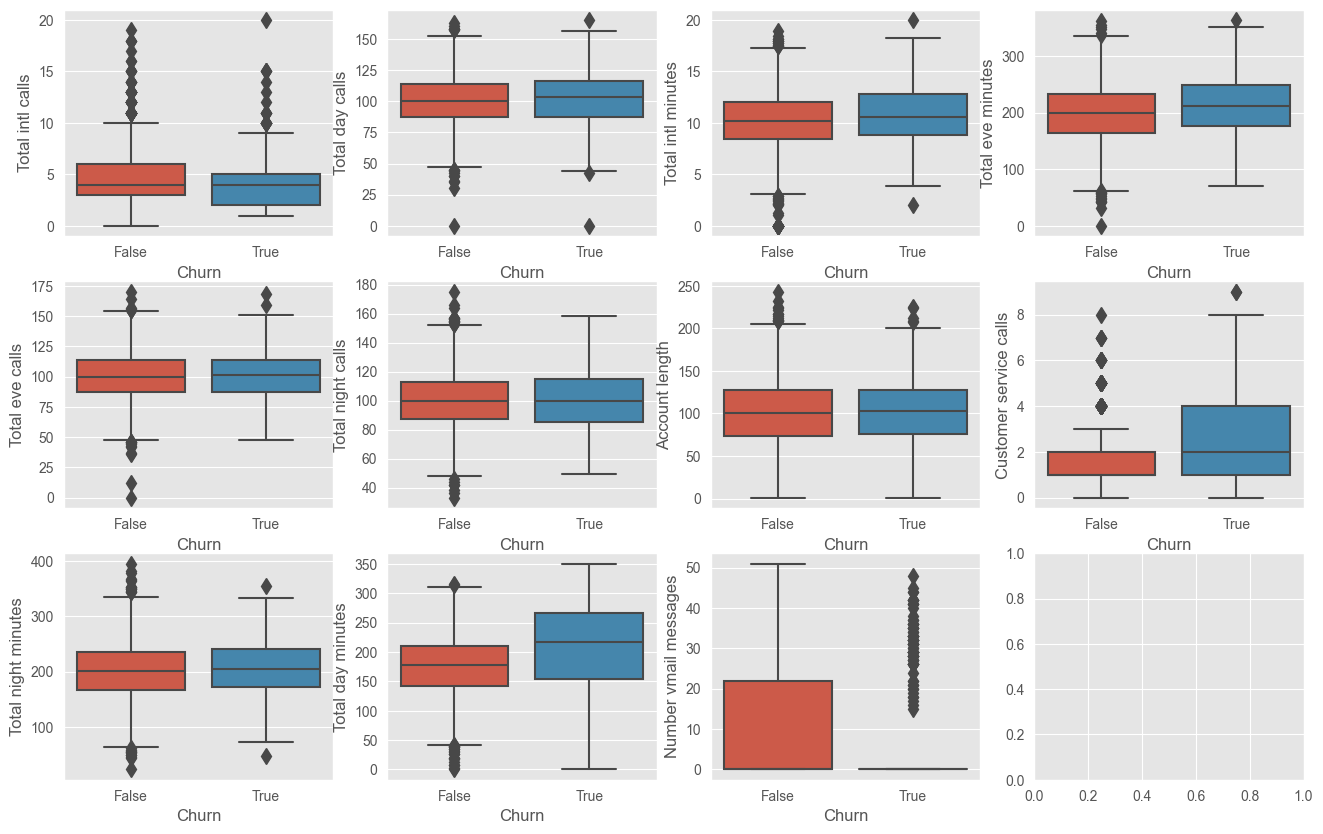

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, fliersize=8, ax=axes[int(idx / 4), idx % 4])
    # axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('Churn')
    axes[int(idx / 4), idx % 4].set_ylabel(feat)

На око найбільшу відмінність ми бачимо для ознак `Total day minutes`, `Customer service calls` і `Number vmail messages`. На наступних лекціях ми навчимося визначати важливість ознак для задачі класифікації за допомогою випадкового лісу (або градієнтного бустингу), і виявиться, що перші дві - дійсно дуже важливі ознаки для прогнозування відтоку.

Глянемо окремо на рисунки з розподілом кількості проговорених хвилин упродовж дня поміж лояльних та тих, що пішли. Зліва - знайомі нам `boxplot`-и, праворуч - згладжені гістограми розподілу кількісної ознаки у двох групах (тут це просто гарний рисунок, все і так зрозуміло за `boxplot`-ом).

Цікаве **спостереження**: в середньому ті клієнти, що пішли від компанії, частіше користуються зв'язком. Можливо, вони були незадоволені тарифами, і тому одним із рішень щодо зниження відтоку буде зниження тарифних ставок (вартості мобільного зв'язку). Проте компанії треба буде проводити додатковий економетричний аналіз, щоб розуміти чи дійсно такі заходи будуть економічно виправданими.

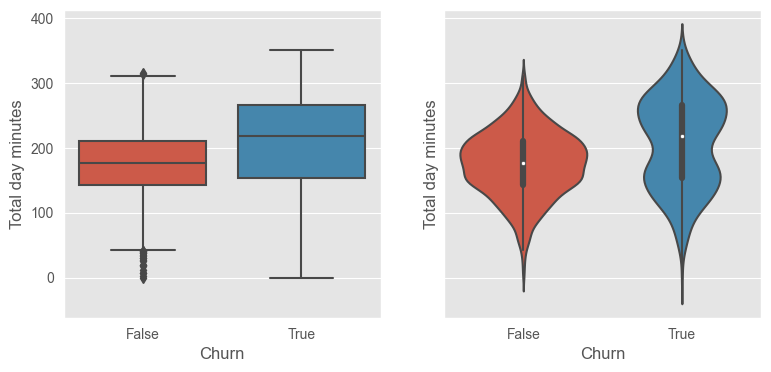

In [59]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(9, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])
plt.gcf().set_dpi(100)

Тепер подамо розподіл кількості звернень у сервісний центр. Тут унікальних значень ознаки небагато (ознаку можна вважати як кількісною цілочисельною, так і порядковою), й наочніше зобразити розподіл за допомогою `countplot`. **Спостереження**: частка відтоку сильно зростає починаючи з 4 дзвінків в сервісний центр.

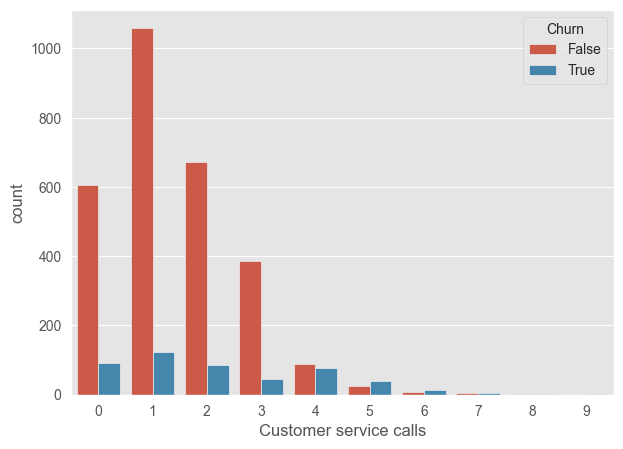

In [60]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)
plt.gcf().set_dpi(100)

Далі перевіримо зв'язок бінарних ознак `International plan` і `Voice mail plan` з відтоком. **Спостереження :** коли роумінг підключений, частка відтоку є набагато вищою, тобто наявність міжнародного роумінгу - сильна ознака. Щодо голосової пошти таке твердження невиправдане.

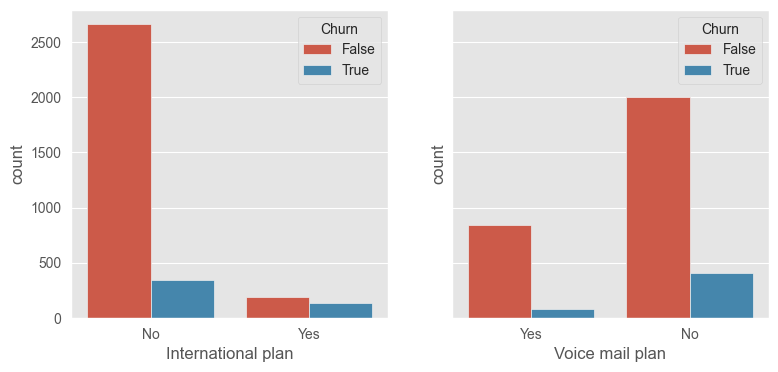

In [61]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(9,4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])
plt.gcf().set_dpi(100)

Насамкінець, подивимося, як з відтоком пов'язаний категоріальна ознака `State`. З цією ознакою вже не так приємно працювати, оскільки кількість унікальних штатів є досить великою - 51. Можна на початку побудувати зведену таблицю або порахувати відсоток відтоку для кожного штату. Але ми бачимо, що даних за кожним штатом окремо замало (тих клієнтів, що пішли - всього від 3 до 17), тому, можливо, ознаку `State` згодом не варто додавати у моделі класифікації через ризик *перенавчання* (але ми це будемо перевіряти на *крос-валідації*, stay tuned!).

In [62]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


Частки відтоку для кожного штату:

In [63]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,MT,AR,KS,NY,MN,PA,MA,CT,NC,NH,GA,DE,OK,OR,UT,CO,KY,SD,OH,FL,IN,ID,WY,MO,VT,AL,NM,ND,WV,TN,DC,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,0.205882,0.2,0.185714,0.180723,0.178571,0.177778,0.169231,0.162162,0.161765,0.160714,0.148148,0.147541,0.147541,0.141026,0.138889,0.136364,0.135593,0.133333,0.128205,0.126984,0.126761,0.123288,0.116883,0.111111,0.109589,0.1,0.096774,0.096774,0.09434,0.09434,0.092593,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


Бачимо, що в Нью-Джерсі та Каліфорнії частка відтоку вище 25%, а на Гаваях і в Алясці менше 5%. Але ці висновки побудовані за надто скромною статистикою і можливо, це просто особливості наявних даних.

Нарешті побудуємо t-SNE подання даних. Назва методу складна - [t-distributed Stohastic Neighbor Embedding](https://uk.wikipedia.org/wiki/T-%D1%80%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB%D0%B5%D0%BD%D0%B5_%D0%B2%D0%BA%D0%BB%D0%B0%D0%B4%D0%B5%D0%BD%D0%BD%D1%8F_%D1%81%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%97_%D0%B1%D0%BB%D0%B8%D0%B7%D1%8C%D0%BA%D0%BE%D1%81%D1%82%D1%96), математика всередині методу теж крута (але занурюватися в неї ми не будемо). Проте ключова ідея t-SNE проста, як двері: знайдемо таке відображення з багатовимірного простору ознак на площину (або в 3D, але майже завжди вибирають 2D), щоб точки, які були далеко один від одного, на площині теж виявилися віддаленими, а близькі точки - також відобразилися на близькі. Тобто neighbor embedding - це певним чином пошук нового представлення даних, за якого зберігається сусідство.

Трохи деталей: викинемо штати й ознаку відтоку, бінарні Yes/No-ознаки переведемо в числа (за допомогою [`pandas.Series.map`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)). Також потрібно масштабувати вибірку - з кожної ознаки відняти її середнє і розділити на стандартне відхилення, це робить `StandardScaler`.

In [64]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [65]:
# перетворимо всі ознаки в кількісні, викинувши штати
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
%%time
# Побудуємо об'єкт t-SNE
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: total: 45.6 s
Wall time: 6.94 s


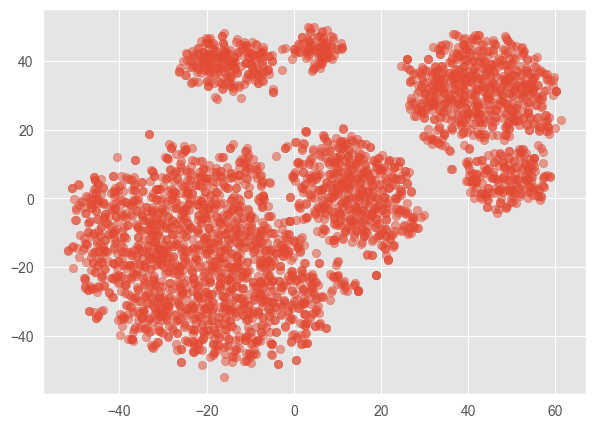

In [67]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5)
plt.gcf().set_dpi(100)

Розфарбуємо отримане t-SNE подання даних за відтоком (сині - лояльні клієнти, помаранчеві - ті, що пішли).

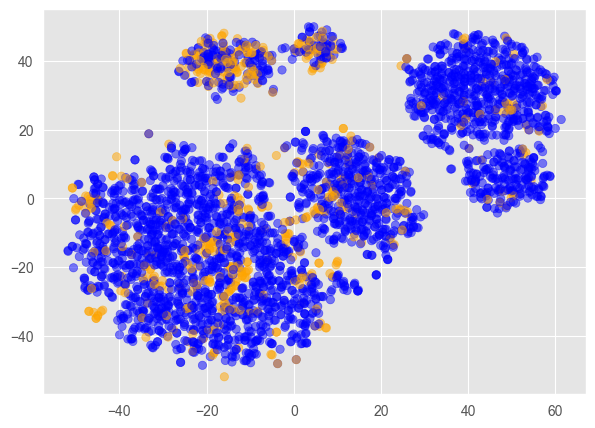

In [68]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
)
plt.gcf().set_dpi(100)

Бачимо, що колишні клієнти, переважно "збиваються" в деяких областях простору ознак.

Щоби краще зрозуміти рисунок, можна також розфарбувати його за іншими бінарним ознаками - за роумінгом (`International Plan`) та голосовою поштою (`Voicemail`). Сині ділянки відповідають об'єктам, які мають ці бінарні ознаки.

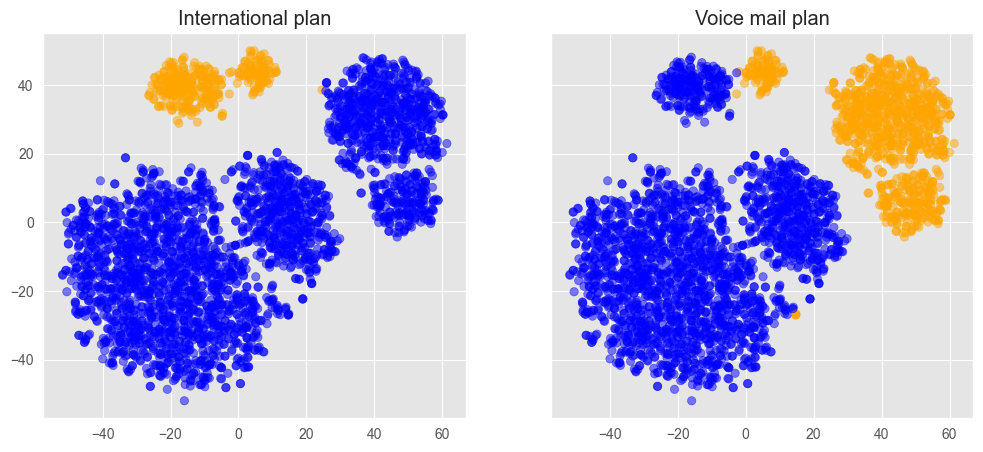

In [70]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name)

Тепер зрозуміло, що, наприклад, багато колишніх клієнтів збиваються в лівому кластері людей з підключеним роумінгом, але без голосової пошти.

Наостанок зазначимо мінуси t-SNE:
 - велика обчислювальна складність; ось ця реалізація `sklearn` навряд допоможе у реальній задачі, на більших вибірках варто подивитися в бік [Multicore-TSNE] (https://github.com/DmitryUlyanov/Multicore-TSNE);
 - рисунок може сильно змінитися за зміною `random seed`, це ускладнює інтерпретацію. [Ось] (http://distill.pub/2016/misread-tsne/) добра стаття щодо t-SNE; проте загалом за такими рисунками не варто робити далекосяжних висновків - це як гадання за кавовою гущею; іноді щось кидається в очі і підтверджується при вивченні, але це не часто відбувається.

Нижче наведемо ще кілька рисунків для розуміння t-SNE. За допомогою t-SNE можна дійсно отримати гарне уявлення щодо даних (як у випадку з рукописними цифрами, [ось](https://colah.github.io/posts/2014-10-Visualizing-MNIST/) хороша стаття), так і просто намалювати ялинкову іграшку.

![image](https://raw.githubusercontent.com/radiukpavlo/intelligent-data-analysis/main/03_img/2_tsne_mnist.png)

![image](https://raw.githubusercontent.com/radiukpavlo/intelligent-data-analysis/main/03_img/2_tsne_christmas_toy.jpg)

<a class="anchor" id="2.3"></a>

## <span style="color:blue; font-size:1.2em;">2.3. Корисні посилання</span>

[Повернутися до змісту](#2)

* Official Matplotlab [documentation](https://matplotlib.org/stable/contents.html).
* Official Seaborn [documentation](https://seaborn.pydata.org/tutorial.html).
* Official Plotly [documentation](https://plotly.com/python/).
* Що таке візуальна аналітика? - визначення з техопедії [посилання](https://uk.theastrologypage.com/visual-analytics).
* Data and information visualization [wiki](https://en.wikipedia.org/wiki/Data_and_information_visualization).